<a href="https://colab.research.google.com/github/ashrafsusts19/machine_learning_lab/blob/main/Assignments/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('/content/sample_data/data.txt', header = None, names = ['X1', 'X2', 'Y'])
data.head()


,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


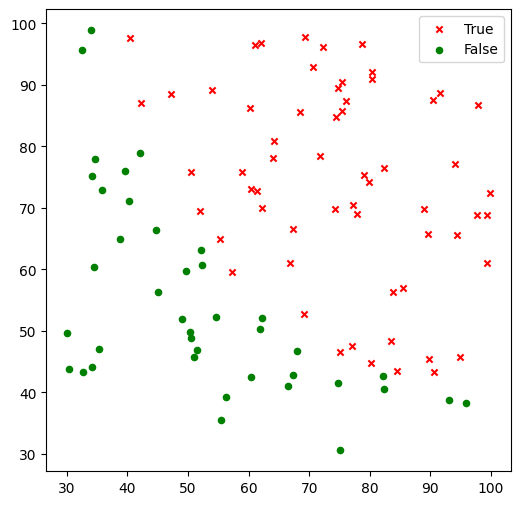

In [4]:


X_train = data[['X1', 'X2']].values
y_train = data['Y'].values

labelpos = "True"
labelneg = "False"

figure, axis = plt.subplots(1, 1, figsize=(6, 6))

pos = y_train == 1
neg = y_train == 0

axis.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', c='red', s=20, label=labelpos)
axis.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', c ='green', s=20, label=labelneg)
axis.legend(loc='best')



<ipython-input-9-d9a00ff01733>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[rind, 0], X_train[rind, 1], cmap='Dark2', label=f'{class_name[class_val]}')


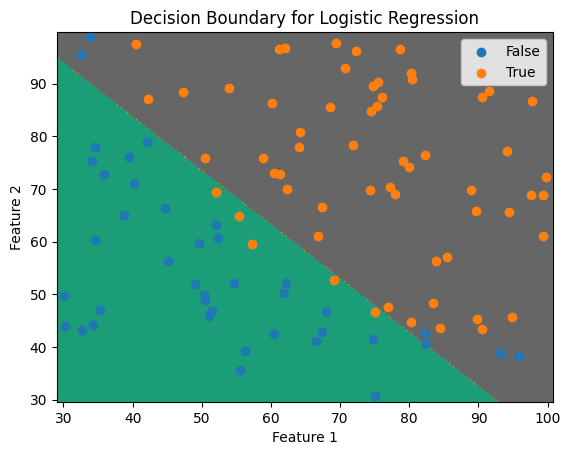

In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

x1mn = X_train[:, 0].min() - 1
x1mx = X_train[:, 0].max() + 1

x2mn = X_train[:, 1].min() - 1
x2mx = X_train[:, 1].max() + 1


gridx1, gridx2 = np.arange(x1mn, x1mx, 0.1), np.arange(x2mn, x2mx, 0.1)

x, y = np.meshgrid(gridx1, gridx2)

r1, r2 = x.flatten(), y.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1, r2))

predictions = lr_model.predict(grid)

z = predictions.reshape(x.shape)

plt.contourf(x, y, z, cmap='Dark2')

class_name = ["False", "True"]
for class_val in np.unique(y_train):
    rind = np.where(y_train == class_val)
    plt.scatter(X_train[rind, 0], X_train[rind, 1], cmap='Dark2', label=f'{class_name[class_val]}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary for Logistic Regression")
plt.show()
